# Minimizing Loss
This notebook is a learning exercise inspired from Harvard edx TinyML course. 
The idea here is to write a simple, single layered neuron that learns a linear equation:
y = wx + b
and predicts y for a given x where w is the wight and b is the bias parameter. Basically the model has to learn how to adjust w and b to get to a predicted y as close as possible to reality.

## Main Idea
The main idea here is to minimize a loss function. In a machine learning model you provide the model with Questions and known Answers to these questions. Model churns out the inputs and figure out Rules that can be applied to figure out future Answers to new Unseen Questions.

## ML Paradigm
ML paradigm diagram basically envisions 3 blocks:

-> Repeat N times <br>
Guess | Predict | Measure & minimize Loss

## Measuring and Minimizing Loss
One way to measure the difference between the guess and prediction is to literally take the difference of the two values, like (Guess - Prediction). Now this value can become negative and it can have unwanted consequences. So we can square the value up and take it's square root. That way, we eliminate -ve values and have a positive integer that is the measure of the loss at that moment. 
**This is basically 'Mean Squared Error' algorithm.** 

We know that taking squares of values mean that we have a parabola here to talk about. Thinking about parabola tells us that the minimum value of the parabola is right at the bottom of the inversed bell shape. This is the global minimum of the parabola. We need to move towards that point if we wish to minimize the error, i.e., to minimize the loss. Calculus can help us here. Taking derivative at any point gives us the slope of the gradient going towards the bottom of the parabola. That's exactly what we want. So we keep taking derivatives and move downwards the slope of the gradient. 
** This is called as Stochastic Gradient Descent.**
One important thing to keep in mind is the rate at which we move down the gradient should be chosen very carefully. Too small value would mean we will take excruciatingly long time to arrive at the bottom. Choosing too large a value would mean that we may run pass the global minima and encounter a ping pong like situation where we never reach global minima and have to settle on a sub-optimal minimum value.
** This value is called as Learning Rate.**

In [65]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Initial random guess for w and b
INITIAL_WEIGHT_W = 10.0
INITIAL_BIAS_B = 10.0

# Learning rate is the amount by which we move down the gradient
LEARNING_RATE = 0.09

# xs is the data input, Questions
xs = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
# ys is the training input, Answers
ys = [-3.0, -1.0, -1.0, 3.0, 5.0, 7.0]
# Training model has to figure out the relation between xs and ys
# which is by the way y=wx+b where w = 2 and b = -1
TRUE_W = 2.0
TRUE_B = -1.0

# lists to keep step details during training to visualize
list_b = []
list_w = []
list_losses = []
epochs = range(100)

## Model definition

In [66]:
# This is our model that basically defines the function that gives us the result 
# of the prediction, i.e., for given b and w, this object will calculate y=wx+b
class Model():
    # constructor 
    def __init__(self):
        # these variables are public and they will be updated by the callers of the 
        # operator function __call__      
        self.w = tf.Variable(INITIAL_WEIGHT_W)
        self.b = tf.Variable(INITIAL_BIAS_B)
    
    # operator function
    def __call__(self, x):
        return self.w*x + self.b

## Calculating Loss

In [67]:
# Function that calculates loss
def CalculateLoss(predictedY, targetY):
    # we take difference of the predicted and target value and square it up
    # to eliminate -ves and then take a mean (average) of the whole tensor.
    # we have only 1 dim tesnor.
    return tf.reduce_mean(tf.square(predictedY - targetY))

## Training process

Here there a few things to note about my implementation. I am trying to do all epochs in one go inside the training method, unlike Harvard approach. Now, GradientTape releases resources as soon as the tape.gradient method is invoked. That's why I am going to use custom calling mechanism here where I will tell the tape to be persistent and watch over the gradients only for the variables I will ask it to watch over.

In [68]:
# This method does the actual training. It is using TensorFlow's GradientTape construct to 
# perform derivatives. 
def DoTraining(model, inputData, trainingData, epochs):
    for epoch in epochs:
        list_w.append(model.w.numpy())
        list_b.append(model.b.numpy())
        with tf.GradientTape(persistent=True, watch_accessed_variables=False) as tape:
            tape.watch([model.w, model.b])
            currentLoss = CalculateLoss(model(inputData), trainingData)
        dw, db = tape.gradient(currentLoss, [model.w, model.b])
        # now we have derivative i.e., slope indication of 'currentLoss' given
        # w and b and hence we can assign new values to b and w to adjust the model
        # for next iteration
        model.w.assign_sub(dw * LEARNING_RATE)
        model.b.assign_sub(db * LEARNING_RATE)

        # this is just for showing a nice little graph
        list_losses.append(currentLoss)

        print('epcoh=%2d, w=%1.2f, b=%1.2f, loss=%2.5f' % (epoch, list_w[-1], list_b[-1], currentLoss))

print(len(list_b))
print(len(list_w))

0
0


## Putting it all together

This part uses the Model, Training and Loss Calculation given above to make a ML neuron.

In [69]:
model = Model()
DoTraining(model, xs, ys, epochs)

epcoh= 0, w=10.00, b=10.00, loss=729.00000
epcoh= 1, w=-0.47, b=5.80, loss=30.92664
epcoh= 2, w=-0.07, b=5.18, loss=25.37730
epcoh= 3, w=0.13, b=4.57, loss=20.97735
epcoh= 4, w=0.31, b=4.01, loss=17.35709
epcoh= 5, w=0.47, b=3.51, loss=14.37830
epcoh= 6, w=0.62, b=3.05, loss=11.92734
epcoh= 7, w=0.75, b=2.63, loss=9.91066
epcoh= 8, w=0.87, b=2.26, loss=8.25132
epcoh= 9, w=0.98, b=1.92, loss=6.88601
epcoh=10, w=1.08, b=1.61, loss=5.76261
epcoh=11, w=1.17, b=1.33, loss=4.83828
epcoh=12, w=1.25, b=1.07, loss=4.07773
epcoh=13, w=1.33, b=0.84, loss=3.45194
epcoh=14, w=1.40, b=0.63, loss=2.93703
epcoh=15, w=1.46, b=0.44, loss=2.51337
epcoh=16, w=1.51, b=0.27, loss=2.16477
epcoh=17, w=1.56, b=0.11, loss=1.87794
epcoh=18, w=1.61, b=-0.03, loss=1.64194
epcoh=19, w=1.65, b=-0.16, loss=1.44775
epcoh=20, w=1.69, b=-0.28, loss=1.28798
epcoh=21, w=1.72, b=-0.38, loss=1.15651
epcoh=22, w=1.75, b=-0.48, loss=1.04834
epcoh=23, w=1.78, b=-0.57, loss=0.95933
epcoh=24, w=1.81, b=-0.65, loss=0.88610
epcoh=

## Plot the results

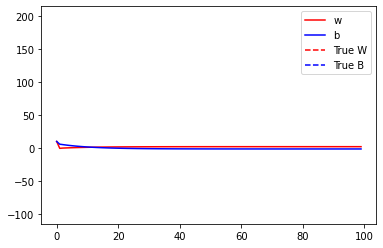

In [70]:
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')
plt.plot([TRUE_W] * len(epochs), '--r', [TRUE_B] * len(epochs), '--b')
plt.legend(['w', 'b', 'True W', 'True B'])
plt.show()